# Capstone Project — The Battle of Neighbourhoods

## Introduction

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 11 million. However, the much larger metro area has a population that exceeds 30 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City 

### This excercise will help people to find out best Italian reatsrants and best place to stay to have Italian and other food in Delhi. Also this will help to identify the best reatsurants in Delhi.


![RS](https://raw.githubusercontent.com/hiteshkanzariya1984/The-battle-of-neighbourhood/master/New%20Delhi%20Restaurants.png)

## Data Collection

#### For this project we need the following data:



- New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
- Data source : [Zomato kaggel dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
- Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
- Nearby places in each locality of new delhi city.
- Geographical Coordinates : [Fousquare API](https://developer.foursquare.com/)
- Description : By using this api we will get all the venues in each neighborhood*

#### Approach

- Collect the new delhi city data from [Zomato kaggel dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

### Importing required libraries

In [8]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-21.2.0               |     pyhd8ed1ab_0          44 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    entrypoints-0.3            |  pyhd8ed1ab_1003           8 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    jsonschema-3.2.0           |     pyhd8ed1ab_3          45 KB  conda-forge
    pyrsistent-0.17.3          |   py36h8f6f2f9_2          89 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-

### Data Retrieval

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/hiteshkanzariya1984/The-battle-of-neighbourhood/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [10]:
df_india = df[df['Country Code'] == 1]
df_nd = df_india[df_india['City'] == 'New Delhi']
df_nd.reset_index(drop=True, inplace=True)
df_nd.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [11]:
df_Res= df_nd[df_nd.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [12]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [13]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [14]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [15]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

### Searching for best places that have the best restaurant in New Delhi


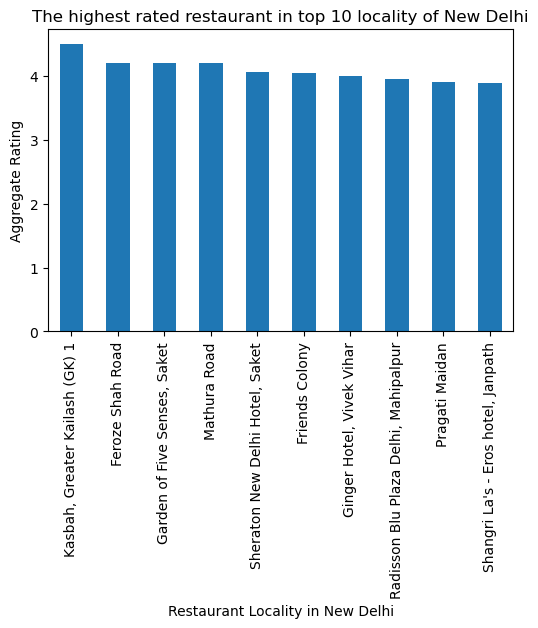

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), dpi = 100)
# title
plt.title('The highest rated restaurant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in **Kesbah, Greater Kailash area**.

### Places that have worst restaurants in New Delhi

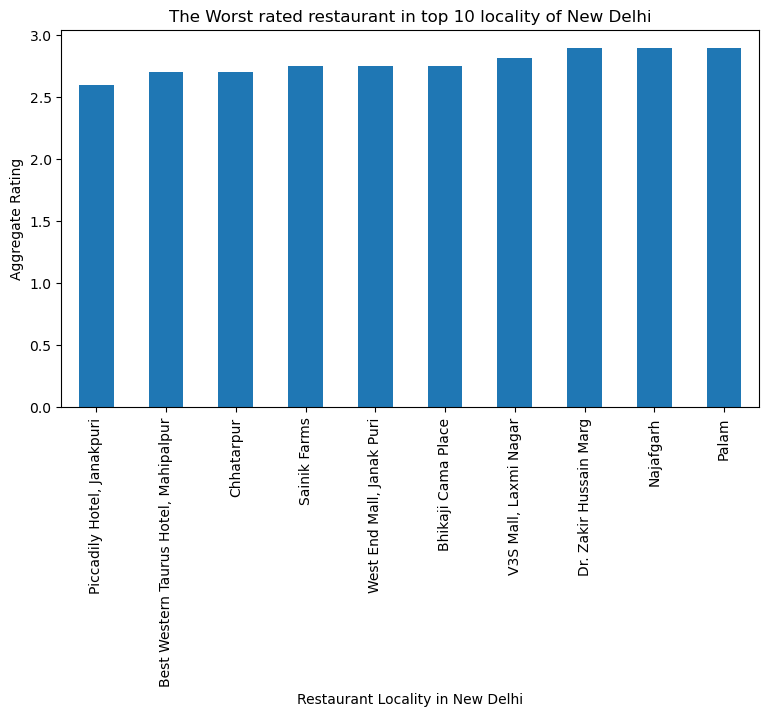

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated restaurant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

### Highest number of restaurants in New Delhi city

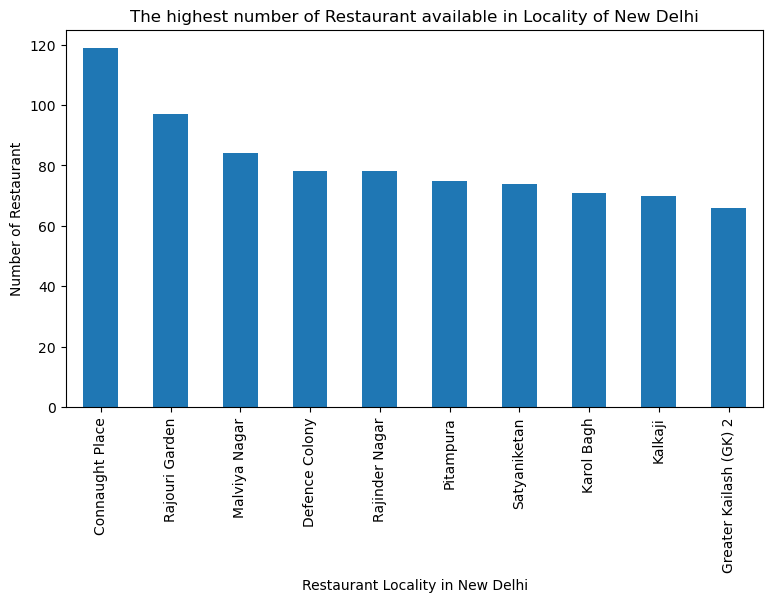

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**Connaught Place** is the best places for edible person to stay there.

### Suitable place for edible person in New Delhi city

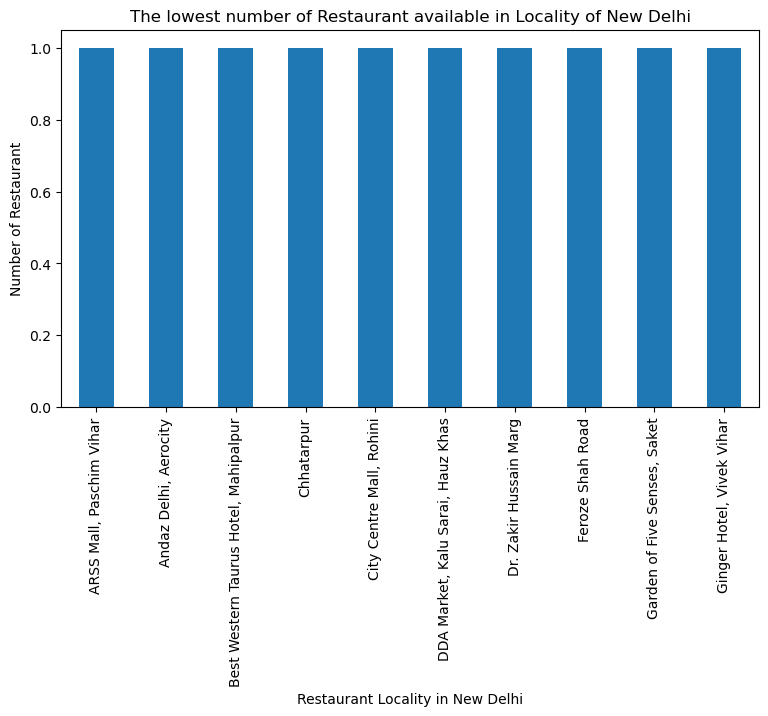

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

### Best places for Italian restaurant in New Delhi city

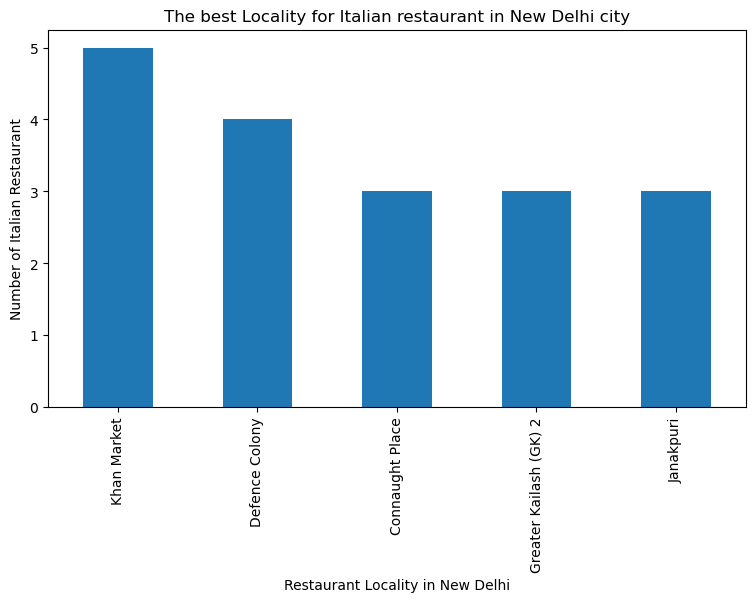

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Italian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Italian Restaurant')

#displays the plot
plt.show()

**Khan Market** is the best place for Chinese restaurant.

### Which places are the best Italian resturants in New Delhi?

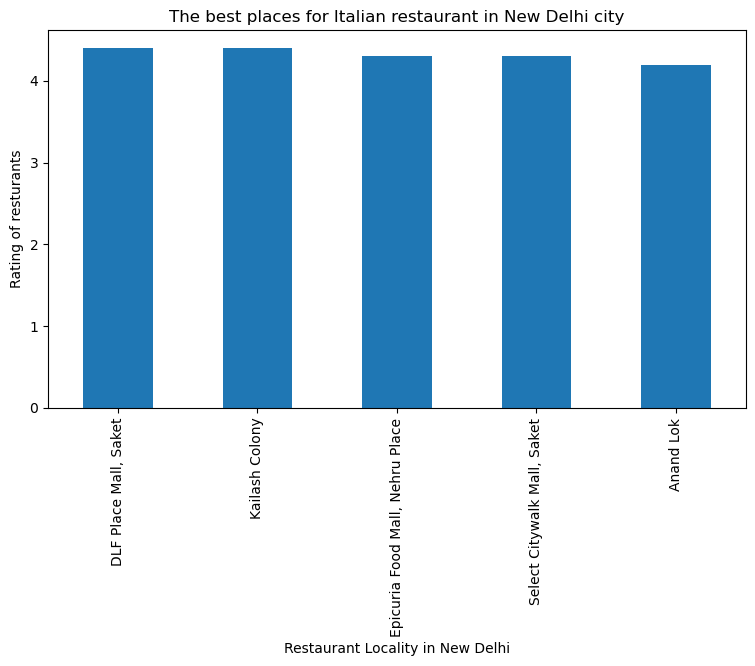

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Italian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

**DLF Place Mall, Saket and Kailash Colony** places have the best Italian resturants

### Data transformation

#### Based on Locality grouping the data

In [22]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [23]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [24]:
df_final.shape

(240, 8)

### Define Foursquare Credentials and Version Using Foursquare API

In [25]:
## Define Foursquare Credentials and Version
CLIENT_ID = '354HPQ0OX3ZUW5BUBS4WZ50XV2Z0B34NQ2QW5DTETN0QSZYP' # Foursquare ID
CLIENT_SECRET = 'A5ZGD020KBHRFZR4N5LMCWQTL5RA5IAMOWCPICGCRO0QYH3Z' # Foursquare Secret
VERSION = '20210724' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 354HPQ0OX3ZUW5BUBS4WZ50XV2Z0B34NQ2QW5DTETN0QSZYP
CLIENT_SECRET:A5ZGD020KBHRFZR4N5LMCWQTL5RA5IAMOWCPICGCRO0QYH3Z


### Create a function to repeat the same process to all the Locality in New Delhi

In [26]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Find the venues in all New Delhi Locality**

In [27]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [28]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [29]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         7                   7      7   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   6                   6      6   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 19                  19     19   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          29                  29     29   
Yusuf Sarai                                    12                  12     12   
ibis New Delhi, Aerocity                       27                  27     27   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      7                7   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                6                6   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              19               19   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       29               29   
Yusuf Sarai                                 12               12   
ibis New Delhi, Aerocity                    27               27   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      7  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                6  
...                                        ...  
West Gate Mall, Rajouri Garden              19  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       29  
Yusuf Sarai                                 12  
ibis New Delhi, Aerocity                    27  

[237 rows x 6 columns]

In [30]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 206 uniques categories.


In [31]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Arcade  ...  Toy / Game Store  Trail  Train Station  \
0                    0       0  ...                 0      0              0   
1                    0       0  ...                 0      0              0   
2                    0       0  ...                 0      0              0   
3                    0       0  ...                 0      0              0   
4                    0       0  ...                 0      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wings Joint  Women's Store  
0                      0           0            0              0  
1                      0           0            0              0  
2                      0           0            0              0  
3                      0           0            0              0  
4                      0           0            0              0  

[5 rows x 207 columns]

In [32]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
232  West Gate Mall, Rajouri Garden  0.000000           0.000000   
233                West Patel Nagar  0.000000           0.000000   
234           Worldmark 1, Aerocity  0.000000           0.034483   
235                     Yusuf Sarai  0.000000           0.000000   
236        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  Airport Food Court  Airport Lounge  Airport Service  \
0                  0.0                 0.0        0.000000              0.0   
1                  0.0                 0.0        0.000000              0.0   
2                  0.0                 0.0        0.000000              0.0   
3                  0.0                 0.0        0.142857              0.0   
4                  0.0                 0.0        0.000000              0.0   
..                 ...                 ...             ...              ...   
232                0.0                 0.0        0.000000              0.0   
233                0.0                 0.0        0.000000              0.0   
234                0.0                 0.0        0.000000              0.0   
235                0.0                 0.0        0.000000              0.0   
236                0.0                 0.0        0.000000              0.0   

     Airport Terminal  American Restaurant  Arcade  ...  Toy / Game Store  \
0            0.000000             0.000000     0.0  ...               0.0   
1            0.000000             0.000000     0.0  ...               0.0   
2            0.000000             0.000000     0.0  ...               0.0   
3            0.142857             0.000000     0.0  ...               0.0   
4            0.000000             0.000000     0.0  ...               0.0   
..                ...                  ...     ...  ...               ...   
232          0.000000             0.052632     0.0  ...               0.0   
233          0.000000             0.000000     0.0  ...               0.0   
234          0.000000             0.000000     0.0  ...               0.0   
235          0.000000             0.000000     0.0  ...               0.0   
236          0.000000             0.000000     0.0  ...               0.0   

     Trail  Train Station  Turkish Restaurant  Udupi Restaurant  \
0      0.0       0.000000                 0.0               0.0   
1      0.0       0.000000                 0.0               0.0   
2      0.0       0.000000                 0.0               0.0   
3      0.0       0.000000                 0.0               0.0   
4      0.0       0.000000                 0.0               0.0   
..     ...            ...                 ...               ...   
232    0.0       0.000000                 0.0               0.0   
233    0.0       0.000000                 0.0               0.0   
234    0.0       0.034483                 0.0               0.0   
235    0.0       0.000000                 0.0               0.0   
236    0.0       0.037037                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
232                 

In [33]:
New_Delhi_grouped.shape

(237, 207)

In [34]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2         Restaurant  0.14
3   Parsi Restaurant  0.14
4                Pub  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2          Multiplex   0.2
3      Shopping Mall   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3           Coffee Shop  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                     venue  freq
0        Indian Restaurant  0.50
1              Pizza Place  0.17
2         Department Store  0.17
3     Fast Food Restaurant  0.17
4  North Indi

In [35]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma     Indian Restaurant   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura     Indian Restaurant   
..                              ...                   ...   
232  West Gate Mall, Rajouri Garden            Restaurant   
233                West Patel Nagar              Pharmacy   
234           Worldmark 1, Aerocity                 Hotel   
235                     Yusuf Sarai     Indian Restaurant   
236        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0                     ATM           Coffee Shop   
1                    Café      Parsi Restaurant   
2             Pizza Place             Multiplex   
3     Rental Car Location           Coffee Shop   
4    Fast Food Restaurant      Department Store   
..                    ...                   ...   
232                  Café  Fast Food Restaurant   
233           Pizza Place                 Hotel   
234           Coffee Shop       Bed & Breakfast   
235           Coffee Shop                Lounge   
236           Coffee Shop                   Spa   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant        Sandwich Place   
1                        Restaurant                   Pub   
2                     Shopping Mall                 Hotel   
3              Fast Food Restaurant        Airport Lounge   
4                       Pizza Place                 Diner   
..                              ...                   ...   
232               Indian Restaurant            Hookah Bar   
233            Fast Food Restaurant         Women's Store   
234                             Spa     Indian Restaurant   
235                             Bar      Asian Restaurant   
236               Indian Restaurant    Italian Restaurant   

    6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0                  Market      Chinese Restaurant           Pizza Place   
1      Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
2                    Café           Women's Store           Flower Shop   
3        Airport Terminal                    Food     Food & Drink Shop   
4             Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
..                    ...                     ...                   ...   
232          Dessert Shop                  Garden           Snack Place   
233           Flea Market  Furniture / Home Store    Frozen Yogurt Shop   
234    Italian Restaurant                  Buffet            Restaurant   
235                 Hotel       Korean Restaurant                  Park   
236            Restaurant           Shopping Mall       Bed & Breakfast   

    9th Most Common Venue 10th Most Common Venue  
0       Electronics Store                   Food  
1              Food Truck             Food Court  
2      Frozen Yogurt Shop    Fried Chicken Joint  
3              Food Court          Women's Store  
4     Fried Chicken Joint      French Restaurant  
..                    ...                    ...  
232             Multiplex     Chinese Restaurant  
233   Fried Chicken Joint      French Restaurant  
234         Shopping Mall     Punjabi Restaurant  
235        Ice Cream Shop    Japanese Restaurant  
236    Punjabi Restaurant                    Gym  

[237 rows x 11 columns]

In [37]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(237,)

In [39]:
# add clustering labels
New_Delhi_merged = df_final.head(237)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               2   
1  Average, Good, Poor, Very Good         1560               3   
2                   Average, Good          434               2   
3                         Average           59               1   
4                         Average          126               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Coffee Shop   
1     Indian Restaurant                  Café      Parsi Restaurant   
2     Indian Restaurant           Pizza Place             Multiplex   
3                 Hotel   Rental Car Location           Coffee Shop   
4     Indian Restaurant  Fast Food Restaurant      Department Store   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant        Sandwich Place                Market   
1                      Restaurant                   Pub    Frozen Yogurt Shop   
2                   Shopping Mall                 Hotel                  Café   
3            Fast Food Restaurant        Airport Lounge      Airport Terminal   
4                     Pizza Place                 Diner           Gaming Cafe   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0      Chinese Restaurant           Pizza Place     Electronics Store   
1     Fried Chicken Joint     French Restaurant            Food Truck   
2           Women's Store           Flower Shop    Frozen Yogurt Shop   
3                    Food     Food & Drink Shop            Food Court   
4  Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

  10th Most Common Venue  
0                   Food  
1             Food Court  
2    Fried Chicken Joint  
3          Women's Store  
4      French Restaurant

In [40]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
6    28.527088    3.117391       Average, Good, Poor         1012   
7    28.541298    3.425000  Average, Good, Very Good         2460   
27   28.716874    3.400000                   Average          134   
29   28.681233    3.300000  Average, Good, Very Good          769   
34   28.720602    3.600000                      Good          119   
..         ...         ...                       ...          ...   
217  28.535183    3.066667                   Average           37   
219  28.638846    3.048148             Average, Good          290   
221  28.560593    3.733333  Average, Good, Very Good          615   
223  28.619954    2.905714             Average, Poor          242   
230  28.658041    3.400000                   Average           19   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6                 0                Market           Coffee Shop   
7                 0           Coffee Shop    Italian Restaurant   
27                0      Department Store         Shopping Mall   
29                0            Smoke Shop          Burger Joint   
34                0      Asian Restaurant                 Hotel   
..              ...                   ...                   ...   
217               0                 Hotel     Indian Restaurant   
219               0  Fast Food Restaurant    Light Rail Station   
221               0                Market           Pizza Place   
223               0                   ATM     Indian Restaurant   
230               0                  Park           Snack Place   

       3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
6                 Steakhouse     Food & Drink Shop  New American Restaurant   
7              Shopping Mall      Asian Restaurant     Fast Food Restaurant   
27         Indian Restaurant             Multiplex                      Gym   
29               Coffee Shop    Light Rail Station       Chinese Restaurant   
34      Fast Food Restaurant        Clothing Store       Light Rail Station   
..                       ...                   ...                      ...   
217            Women's Store           Flea Market              Gaming Cafe   
219  North Indian Restaurant         Metro Station            Women's Store   
221                     Park           Music Venue     Fast Food Restaurant   
223              Flower Shop                Garden              Gaming Cafe   
230             Burger Joint         Burrito Place              Bus Station   

      6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
6             Women's Store  Furniture / Home Store      Frozen Yogurt Shop   
7                      Café          Clothing Store      Chinese Restaurant   
27       Light Rail Station    Fast Food Restaurant                    Café   
29              Flower Shop             Gaming Cafe  Furniture / Home Store   
34               Theme Park           Shopping Mall      English Restaurant   
..                      ...                     ...                     ...   
217  Furniture / Home Store      Frozen Yogurt Shop     Fried Chicken Joint   
219             Flower Shop             Gaming Cafe  Furniture / Home Store   
221           Metro Station                    Café           Women's Store   
223  Furniture / Home Store      Frozen Yogurt Shop     Fried Chicken Joint   
230             Art Gallery                    Café           Women's Store   

    9th Most Common Venue  10th Most Common Venue  
6     Fried Chicken Joint       French Restaurant  
7       Indian Restaurant               Multiplex  
27                   Food  Furniture / Home Store  
29     Frozen Yogurt Shop     Fried Chicken Joint  
34      Electronics Store             Gaming Cafe  
..                    ...                     ...  
217     French Restaurant              Food Truck  
219    Frozen Yogurt Shop     Fried Chicken Joint  
221    Froz

In [42]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
216  28.594859    3.800000                      Good, Very Good          287   
234  28.630044    2.750000                        Average, Poor          238   
236  28.648177    3.675000             Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 1                 Hotel   Rental Car Location   
10                1                 Hotel           Coffee Shop   
12                1                 Hotel     Indian Restaurant   
19                1                 Hotel    Italian Restaurant   
35                1                 Hotel          Liquor Store   
56                1                 Hotel      Sculpture Garden   
60                1                 Hotel             BBQ Joint   
69                1                 Hotel           Coffee Shop   
70                1                 Hotel            Restaurant   
72                1                  Park           Coffee Shop   
83                1                 Hotel           Coffee Shop   
111               1                 Hotel     Indian Restaurant   
112               1                 Hotel           Coffee Shop   
119               1                 Hotel             Hotel Bar   
128               1                   ATM                 Hotel   
148               1         Shopping Mall            Donut Shop   
161               1             BBQ Joint  Fast Food Restaurant   
162               1                 Hotel                  Café   
167               1         Women's Store        History Museum   
168               1   American Restaurant                   Spa   
173               1      Department Store     Indian Restaurant   
196               1     Indian Restaurant  Fast Food Restaurant   
204               1     Indian Restaurant             Nightclub   
209               1     Indian Restaurant                Bakery   
216               1     Indian Restaurant                 Hotel   
234               1     Indi

In [43]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating             Comments  No_of_Votes  Cluster Labels  \
0    28.668945    3.100000              Average          117               2   
2    28.656131    3.275000        Average, Good          434               2   
4    28.690020    3.033333              Average          126               2   
13   28.690182    3.090000  Average, Good, Poor          971               2   
14   28.693969    3.378571        Average, Good         2343               2   
..         ...         ...                  ...          ...             ...   
211  28.579556    3.780000                 Good          709               2   
214  28.561105    3.425000        Average, Good          246               2   
222  28.628988    3.260000  Average, Good, Poor          239               2   
231  28.637492    3.062264  Average, Good, Poor         1253               2   
235  28.652978    3.500000                 Good          178               2   

    1st Most Common Venue      2nd Most Common Venue 3rd Most Common Venue  \
0       Indian Restaurant                        ATM           Coffee Shop   
2       Indian Restaurant                Pizza Place             Multiplex   
4       Indian Restaurant       Fast Food Restaurant      Department Store   
13             Smoke Shop                  BBQ Joint     Indian Restaurant   
14      Indian Restaurant                Snack Place           Pizza Place   
..                    ...                        ...                   ...   
211     Indian Restaurant                       Pool           Snack Place   
214                  Café  Middle Eastern Restaurant     Indian Restaurant   
222    Chinese Restaurant                Pizza Place        Sandwich Place   
231           Pizza Place                Beer Garden             Multiplex   
235            Restaurant                       Café  Fast Food Restaurant   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant        Sandwich Place   
2                     Shopping Mall                 Hotel   
4                       Pizza Place                 Diner   
13                     Dessert Shop           Snack Place   
14          South Indian Restaurant        Sandwich Place   
..                              ...                   ...   
211               French Restaurant                   Spa   
214            Fast Food Restaurant    Italian Restaurant   
222                     Coffee Shop       Business Center   
231            Fast Food Restaurant         Women's Store   
235               Indian Restaurant            Hookah Bar   

    6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
0                  Market      Chinese Restaurant             Pizza Place   
2                    Café           Women's Store             Flower Shop   
4             Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop   
13            Pizza Place                  Market  Furniture / Home Store   
14            Coffee Shop        Asian Restaurant           Women's Store   
..                    ...                     ...                     ...   
211  Gym / Fitness Center      Seafood Restaurant            Cocktail Bar   
214                 Plaza                   Diner           Grocery Store   
222           Flower Shop  Furniture / Home Store      Frozen Yogurt Shop   
231                  Food             Gaming Cafe  Furniture / Home Store   
235          Dessert Shop                  Garden             Snack Place   

    9th Most Common Venue 10th Most Common Venue  
0       Electronics Store                   Food  
2      Frozen Yogurt Shop    Fried Chicken Joint  
4     Fried Chicken Joint      French Restaurant  
13     Frozen Yogurt Shop    Fried Chicken Joint  
14            Flower Shop     Frozen Yogurt Shop  
..                    ...                    ...  
211        Breakfast Spot                  Hotel  
214    Chinese Restaurant                 Loung

In [44]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
28   28.650254    3.166667                              Average, Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
75   28.569040    3.800000                            Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
81   28.536611    3.380000                         Average, Excellent   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
91   28.556503    3.400000                              Average, Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
108  28.563827    3.800000                            Good, Very Good   
120  28.673708    3.133333                                    Average   
123  28.626791    3.250000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
129  28.523047    2.925000                                    Average   
135  28.579641    3.180000                              Average, Good   
143  28.564494    3.140625                   Average, Good, Very Good   
146  28.535040    3.175000                              Average, Good   
158  28.700027    3.157333                        Average, Good, Poor   
160  28.712975    3.066667                                    Average   
170  28.643757    3.575000                              Average, Good   
174  28.550802    3.250000                              Average, Good   
175  28.546931    3.223077                              Average, Good   
177  28.511482    2.750000                              Average, Poor   
179  28.572117    3.871429                   Average, Good, Very Good   
181  28.571849    3.316667                              Average, Good   
185  28.683364    3.000000                              Average, Good   
189  28.620715    3.880000                   Average, Good, Very Good   
190  28.577107    3.100000                                    Average   
200  28.564288    3.200000                                    Average   
202  28.646593    3.280952                   Average, Good, Very Good   
206  28.538993    3.450000                              Average, Good   
207  28.625445    3.600000                   Average, Good, Very Good   
213  28.623619    3.466667                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
225  28.524070    3.686364                   Average, Good, Very Good   
226  28.525054    3.322222                              Average, Good   
227  28.559704    3.278261                   Average, Good, Very Good   
228  28.596073    3.052941                              Average, Good

In [45]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
5    28.700516    3.040000                  Average, Good, Poor          594   
11   28.562580    3.750000             Average, Good, Very Good          875   
22   28.654105    3.085714                              Average           80   
26   28.538688    3.130303                  Average, Good, Poor         2578   
50   28.645084    3.235000       Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471             Average, Good, Very Good         2460   
73   28.643036    3.000000                              Average            7   
90   28.642755    3.450000                        Average, Good          322   
94   28.538153    3.117143                  Average, Good, Poor         3642   
98   28.651527    3.490909             Average, Good, Very Good         3222   
101  28.667644    3.300000                              Average          132   
103  28.652501    3.080000                  Average, Good, Poor         2196   
104  28.656263    3.097619                        Average, Good          965   
130  28.724100    3.133333                              Average          325   
132  28.706295    3.256000             Average, Good, Very Good         1717   
151  28.592153    3.200000                              Average           14   
169  28.667261    3.200000                              Average           76   
180  28.534499    3.000000                  Average, Good, Poor          173   
218  28.552403    3.833333                      Good, Very Good         1133   
220  28.523519    3.700000                                 Good          281   
224  28.636921    2.819231                  Average, Good, Poor         2265   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
233  28.695096    3.050000                              Average           86   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
5                 4           Pizza Place                Multiplex   
11                4      Department Store  Comfort Food Restaurant   
22                4           Pizza Place     Fast Food Restaurant   
26                4                Market     Fast Food Restaurant   
50                4           Pizza Place                    Hotel   
57                4           Pizza Place               Food Truck   
73                4           Pizza Place                    Hotel   
90                4  Fast Food Restaurant              Pizza Place   
94                4                Market     Fast Food Restaurant   
98                4           Pizza Place                    Plaza   
101               4         Historic Site              Pizza Place   
103               4           Pizza Place        Convenience Store   
104               4           Pizza Place                     Park   
130               4      Asian Restaurant              Pizza Place   
132               4  Fast Food Restaurant              Pizza Place   
151               4            Campground              Golf Course   
169               4                 Hotel     Fast Food Restaurant   
180               4                  Café            Deli / Bodega   
218               4                   Bar                    Hotel   
220               4                Market                    Hotel   
224               4  Fast Food Restaurant                Gift Shop   
229               4                  Café       Chinese Restaurant   
233               4                   NaN                      NaN   

    3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
5          Sandwich Place           Salad Place   Gym / Fitness Center   
11      Electronics Store  Fast Food Restaurant                   Food   
22          Women's Store           Flea Market            Gaming Cafe   
26                   Café           Flower Shop            Gaming Cafe   
50             Donut Shop              

## Results and Discussion

Based on the cluster result below we can see that which cluster is recommended Indian restaurants, night clubs, Hotels, cafe, pizza, and fast food. As per the requirement of different people they can choose to live in the best suitable cluster.

As Delhi is one of the business hub in India, people are coming from different region of India as well as different countries. They can utilize the findings from this excercise and choose the best cluster to live in. This data contains most of the restaurants in Delhi with cuisines, ratings and location this will help all kind of food lovers.

#### Cluster 1: It is most recommended for Indian Restaurants. 
#### Cluster 2: It is most recommended for Hotels and nightclub. 
#### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
#### Cluster 4: It is most recommended for the cafe and pizza.


## Conclusion

In conclusion, to end off this project, we had an opportunity on a business problem, and it was tackled in a way that it was similar to how a genuine data scientist would do. We utilized numerous Python libraries to fetch the information, control the content and break down and visualize those datasets. We have utilized Foursquare API to investigate the settings in locations of restaurants in New Delhi, get a great measure of data from Kaggle. We visualized utilizing different plots present in  Matplotlib libraries. Similarly, we utilized Folium to picture it on a map.

- Khan Market and Defence Colony are some of the best neighborhoods for Italian cuisine.

- DLF Place Mall, Saket and Kailash Colony** places have the best Italian resturants

- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. 